# Clustering - GlobalAIHub
📌 **Unsupervised learning** uses machine learning algorithms to discover hidden patterns in the data without the need for human supervision. Their ability to find similarities and contrasts makes them an effective tool for data analysis, grouping, anomaly detection, and other similar tasks. For example, grouping customers according to the types of products they look up and the amount of time they spend online, to analyze which group spends more. Or, detecting credit card fraud from banking transactions, because it stands out from the normal transaction patterns. 

📌 **Clustering**, one of the most commonly used *unsupervised learning* techniques, is an art. The art of grouping different data points according to similarities in their features. Let’s say you’re in a supermarket in a new country. You see on the shelves some exotic fruits. Even though you don’t know what they are called, you can still see that some are big and yellow, while others are small and blue. This is clustering based on the features of the fruit, like size and color.

📌 In clustering, unlike classification, we don’t have the labels of the clusters. We cluster just based on the features. If two fruits have similar shape, size, and color, they are most likely part of the same cluster and hence they are the same type of fruit, say melons or blueberries. 

📌 Now, the question is, how can we make computers perform clustering? Can they independently group the instances from a dataset according to their features? Fortunately, yes. Machine learning has some algorithms for this job. Let’s start with **K-means**, the most famous algorithm of unsupervised learning. K-means is a common clustering approach in which data points are divided into a **“K” number of groups**, depending on their distance from the group’s center. The aim is to group data points that are close to a specific center together. A small number of K will result in larger clusters, whereas a big number of K will result in smaller clusters.

📌 There are different algorithms to help us **optimize K**. But for now, we will use a random number and find out, by trial and error, which K gives us the best performance. The K-means algorithm starts with a first group of randomly selected cluster center points, also referred as centeroids, which are used as the beginning points for every cluster. Then it performs iterative calculations to optimize the positions of the centroids.

📌 How do we know if the model has generated meaningful clusters? One of the commonly used performance evaluation metrics for clusters is the **Silhouette Coefficient**. Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. It compares the average distance of one point with other points in the same cluster to the average distance of the same point to the points in the nearest cluster.

1. The mean distance between a sample and all other points in the same cluster.

2. The mean distance between a sample and all other points in the next nearest cluster.

The score ranges from -1 to +1. Scores around zero indicate overlapping clusters. When clusters are dense and well separated, the score is closer to one. When the score is negative, we know that our clustering is not meaningful.


📌 Now it’s time to practice! The dataset that we’re going to use has been obtained from the machine learning repository of University of California Irvine. It is about live selling, which means demonstrating and selling items through a live stream, typically on social media. Each row shows one product. To understand the links between products and customers, we will use a variety of reactions, the number of comments, and the number of shares to a Facebook post. In total, there are 13 features. Let’s start with loading the dataset.

In [ ]:
import pandas as pd
dataset = pd.read_csv("Live.csv")
dataset.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_link,status_type_photo,status_type_status,status_type_video
0,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0,0.0,0.0,0.0,1.0
1,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0
2,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0,0.0,0.0,0.0,1.0
3,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0
4,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0


📌 We have already mastered loading datasets! We will load this dataset using the pandas library as pd, and we use the head function to observe the first five rows of our dataset. We will continue by initializing the K-means model. Of course, first we need to import it. For now, let’s start by randomly setting the number of clusters to 3. 

In [ ]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)

In [ ]:
model.fit(dataset)

KMeans(n_clusters=3)

📌 After importing and initializing the model, we train it using the model.fit method! Now, we are ready to make predictions. Note that, in the clustering case, predictions show the number of groups that the instance belongs to.

In [ ]:
labels = model.predict(dataset)

📌 As we set the number of clusters to 3, we got three labels. 0,1 and 2. Let’s check how many instances we have in each group. For this we need to import NumPy and use the unique method.

In [ ]:
import numpy as np
np.unique(labels, return_counts=True)

(array([0, 1, 2], dtype=int32), array([4288, 2334,  428]))

📌 Now, let’s go back to the selection of the number of clusters. How can we choose a better number of clusters? Let’s try the silhouette method. In this code, we take a range of values of k-clusters to check, for which K the model performs the best. We use the silhouette_score function from the sklearn library to calculate the mean silhouette coefficient over all samples. We print them and check the numbers. Do you remember what’s the best silhouette score? The best number of K is the one with the highest score, the closest to one. We can easily see it on the graph.

For n_clusters=2, The Silhouette Coefficient is 0.8188237721696822
For n_clusters=3, The Silhouette Coefficient is 0.8972493682244883
For n_clusters=4, The Silhouette Coefficient is 0.9106664962327088
For n_clusters=5, The Silhouette Coefficient is 0.8866768371183754
For n_clusters=6, The Silhouette Coefficient is 0.8430118288915796
For n_clusters=7, The Silhouette Coefficient is 0.8419421782294257
For n_clusters=8, The Silhouette Coefficient is 0.8369757672176514
For n_clusters=9, The Silhouette Coefficient is 0.7592407769460959
For n_clusters=10, The Silhouette Coefficient is 0.7270585050068956
For n_clusters=11, The Silhouette Coefficient is 0.7156089394195576


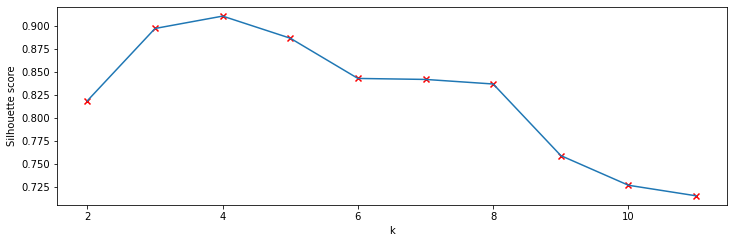

In [ ]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

silhouettes = []
ks = list(range(2, 12))
for n_cluster in ks:
    kmeans = KMeans(n_clusters=n_cluster).fit(dataset)
    label = kmeans.labels_
    sil_coeff = silhouette_score(dataset, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))
    silhouettes.append(sil_coeff)

plt.figure(figsize=(12, 8))    
plt.subplot(211)
plt.scatter(ks, silhouettes, marker='x', c='r')
plt.plot(ks, silhouettes)
plt.xlabel('k')
plt.ylabel('Silhouette score');

📌 We get the highest value of the silhouette coefficient when the number of clusters is 4. We see that we also got a high silhouette coefficient for 3 clusters, so our first choice was not too bad. However, we aim to give our finest performance. So, it would be better if we would choose n_clusters = 4 while initializing the K-means model. Let’s try again by setting it to 4. So, we have four different groups.

In [ ]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=4)
model.fit(dataset)
labels = model.predict(dataset)
import numpy as np
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3], dtype=int32), array([2334, 4288,  365,   63]))

In [ ]:
dataset["labels"] = labels
dataset

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_link,status_type_photo,status_type_status,status_type_video,labels
0,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0,0.0,0.0,0.0,1.0,0
1,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,1
2,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0,0.0,0.0,0.0,1.0,0
3,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,1
4,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,0.018896,0.000000,0.000000,0.018896,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,1
7046,0.003397,0.000000,0.000000,0.002972,0.001522,0.000000,0.006369,0.000000,0.0,0.0,1.0,0.0,0.0,1
7047,0.000425,0.000000,0.000000,0.000212,0.001522,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,1
7048,0.074522,0.000572,0.006425,0.074098,0.003044,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,1


📌 But why did we separate our data into four different groups? What insights can we take from this? We may obtain several insights depending on what we are interested in. To observe some statistics for each of the groups, let’s add the labels to our dataframe and display it. Here is how we do it. From the result, we see that we have assigned different labels to the observations. And these labels are the groups that we found. Each group name has numbers ranging from 0 to 3. Let’s check the average number of comments for each group.

In [ ]:
group_zero = dataset[dataset["labels"]==0]["num_comments"].mean()
group_zero

0.030608773182480085

In [ ]:
group_one = dataset[dataset["labels"]==1]["num_comments"].mean()
group_one

0.0007619566531325929

In [ ]:
group_two = dataset[dataset["labels"]==2]["num_comments"].mean()
group_two

0.001726458130747155

In [ ]:
group_three = dataset[dataset["labels"]==3]["num_comments"].mean()
group_three

0.00027148226290672734

____

In [ ]:
group_zero = dataset[dataset["labels"]==0]["num_shares"].mean()
group_zero

0.03378503171323544

In [ ]:
group_one = dataset[dataset["labels"]==1]["num_shares"].mean()
group_one

0.000745873618182425

In [ ]:
group_two = dataset[dataset["labels"]==2]["num_shares"].mean()
group_two

0.0007473434899500516

In [ ]:
group_three = dataset[dataset["labels"]==3]["num_shares"].mean()
group_three

0.001284119566829823

📌 In this code, we found the average number of comments of each clustered group. And we clearly see that the average number of comments for each group is different. Hence using these numbers, we may find the most famous group among users. According to the number of comments, the most popular group is zero, then followed by two and one, and finally the least famous is three. We can also see the average number of shares for each group. We also observed the number of shares for each group. We see that according to the number of shares the most popular group is again zero. The number of shares for other groups are not significantly different from each other and this may be because the biggest difference in the number of likes is in group zero. Let’s see what more we can come up with. The code snippet may be a bit complex for you, but understanding the insight is enough for this step. Thanks to this code, we can tell that the products of group zero have only photo posts. This means that customers prefer to see photos of the product. Perhaps this is why group zero is so popular among users. These are the kinds of insights clustering can help us find out.

In [ ]:
status_type = dataset[["status_type_photo", "status_type_video", "status_type_status"]].idxmax(axis=1)
dataset = pd.concat([dataset["labels"],status_type.rename("status_type")], axis=1)

In [ ]:
dataset.groupby(["labels","status_type"])["status_type"].count()

labels  status_type       
0       status_type_video     2334
1       status_type_photo     4288
2       status_type_status     365
3       status_type_photo       63
Name: status_type, dtype: int64